# Predict Bollywood movie success

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
data = pd.read_csv("BollywoodBoxOfficeSuccess.csv", encoding="cp1252")

In [2]:
data.columns

Index(['Movie_Name', 'Release_Date(N/LW/Festive)', 'Genre-Defind',
       'Movie_Content', 'Dir_CAT', 'LEAD_ACTOR_CAT', 'Item_Song(Y/N)',
       'Production_House_CAT', 'Music_Dir_CAT', 'Box_Office_Collection',
       'Profit', 'Earning_Ratio', 'Budget', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes', 'Success/Faliure'],
      dtype='object')

In [3]:
data.drop('Movie_Name', axis = 1, inplace=True)

In [4]:
data_complete = pd.get_dummies(data, drop_first = True)

In [5]:
data_complete.columns

Index(['Item_Song(Y/N)', 'Box_Office_Collection', 'Profit', 'Earning_Ratio',
       'Budget', 'Youtube_Views', 'Youtube_Likes', 'Youtube_Dislikes',
       'Success/Faliure', 'Release_Date(N/LW/Festive)_HS',
       'Release_Date(N/LW/Festive)_LW', 'Release_Date(N/LW/Festive)_N',
       'Genre-Defind_Action / Sci Fi', 'Genre-Defind_Comedy',
       'Genre-Defind_Romance', 'Genre-Defind_Thriller / Suspense / Horror',
       'Movie_Content_Art ', 'Movie_Content_Biography',
       'Movie_Content_Book / Novel', 'Movie_Content_Masala',
       'Movie_Content_Prequel / Sequel', 'Movie_Content_Remake',
       'Movie_Content_Satire ', 'Movie_Content_Social Subject', 'Dir_CAT_B',
       'Dir_CAT_LK', 'LEAD_ACTOR_CAT_B', 'LEAD_ACTOR_CAT_LK',
       'Production_House_CAT_B', 'Production_House_CAT_LK', 'Music_Dir_CAT_B',
       'Music_Dir_CAT_LK'],
      dtype='object')

In [14]:
X = data_complete.drop('Success/Faliure', axis = 1)
y = data_complete[['Success/Faliure']]

In [10]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import metrics

seed = 7

Separate data into train and test sets ( 70:30). Use random seed as 7 

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=seed)

# 1. Build best accuracy using Logistic Regression to find successful movie
1. Calculate train and test accuracies
2. Print 'Confusion Matrix'
3. Calculate Precision and Recall
4. Calculate ROC-AUC

In [109]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

predicted = lr.predict(X_test)
predicted_train = lr.predict(X_train)

print("Training accuracy is %f"%(metrics.accuracy_score(y_train,predicted_train)))
print("Testing accuracy is %f"%(metrics.accuracy_score(y_test,predicted)))

print("Confusion matrix")
print(confusion_matrix(y_test,predicted))

print("Precision is %f"%metrics.precision_score(y_test,predicted))
print("Recall is %f"%metrics.recall_score(y_test,predicted))

#print(metrics.classification_report(y_test,predicted))



Training accuracy is 0.891892
Testing accuracy is 0.842105
Confusion matrix
[[18  6]
 [ 0 14]]
Precision is 0.700000
Recall is 1.000000


# 2. Build best accuracy using Naive Bayes to find successful movie
1. Calculate train and test accuracies
2. Print 'Confusion Matrix'
3. Calculate Precision and Recall
4. Calculate ROC-AUC

In [101]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

predicted = model.predict(X_test)
predicted_train = model.predict(X_train)

print("Training accuracy is %f"%(metrics.accuracy_score(y_train,predicted_train)))
print("Testing accuracy is %f"%(metrics.accuracy_score(y_test,predicted)))

print("Confusion matrix")
print(confusion_matrix(y_test,predicted))

print("Precision is %f"%metrics.precision_score(y_test,predicted))
print("Recall is %f"%metrics.recall_score(y_test,predicted))

Training accuracy is 0.693694
Testing accuracy is 0.631579
Confusion matrix
[[22  2]
 [12  2]]
Precision is 0.500000
Recall is 0.142857


In [100]:
#d = {'original':y_test.values.reshape(38),'predicted':predicted}
#df = pd.DataFrame(d)
#df.head(10)

# 3. Build best accuracy using KNN Classifier to find successful movie
1. Calculate train and test accuracies
2. Print 'Confusion Matrix'
3. Calculate Precision and Recall

In [105]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

predicted = model.predict(X_test)
predicted_train = model.predict(X_train)

print("Training accuracy is %f"%(metrics.accuracy_score(y_train,predicted_train)))
print("Testing accuracy is %f"%(metrics.accuracy_score(y_test,predicted)))

print("Confusion matrix")
print(confusion_matrix(y_test,predicted))

print("Precision is %f"%metrics.precision_score(y_test,predicted))
print("Recall is %f"%metrics.recall_score(y_test,predicted))

Training accuracy is 0.729730
Testing accuracy is 0.657895
Confusion matrix
[[19  5]
 [ 8  6]]
Precision is 0.545455
Recall is 0.428571


# 4. Build best accuracy using Decision Tree Classifier to find successful movie

1. Calculate train and test accuracies
2. Print 'Confusion Matrix'
3. Calculate Precision and Recall

In [206]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',random_state=seed)
model.fit(X_train,y_train)

predicted = model.predict(X_test)
predicted_train = model.predict(X_train)

print("Training accuracy is %f"%(metrics.accuracy_score(y_train,predicted_train)))
print("Testing accuracy is %f"%(metrics.accuracy_score(y_test,predicted)))

print("Confusion matrix")
print(confusion_matrix(y_test,predicted))

print("Precision is %f"%metrics.precision_score(y_test,predicted))
print("Recall is %f"%metrics.recall_score(y_test,predicted))

Training accuracy is 1.000000
Testing accuracy is 0.973684
Confusion matrix
[[24  0]
 [ 1 13]]
Precision is 1.000000
Recall is 0.928571


Though the model above gives high accuracy, it is still overfitting the training data. To remove that we have to pass regularization parameters to classifier.

# Build a model which can give more than 95% accuracy

Decision tree already giving high accuracy for the requierment.

# Any features interaction playing key role?

- As per the pairplot below "earning ratio" is a clear indicatore for the success of movie.
- Also as per correlation, box_office_collection, profit, earning ratio are some of the columns highly correlated. But earning_ratio have highest correlation.

In [215]:
data_complete.corr()["Success/Faliure"]

Item_Song(Y/N)                               0.111773
Box_Office_Collection                        0.445483
Profit                                       0.505971
Earning_Ratio                                0.719263
Budget                                       0.075162
Youtube_Views                                0.298442
Youtube_Likes                                0.323764
Youtube_Dislikes                             0.230485
Success/Faliure                              1.000000
Release_Date(N/LW/Festive)_HS               -0.015459
Release_Date(N/LW/Festive)_LW                0.129690
Release_Date(N/LW/Festive)_N                -0.102042
Genre-Defind_Action / Sci Fi                -0.030651
Genre-Defind_Comedy                         -0.023539
Genre-Defind_Romance                         0.027946
Genre-Defind_Thriller / Suspense / Horror   -0.064552
Movie_Content_Art                            0.140098
Movie_Content_Biography                      0.115047
Movie_Content_Book / Novel  

In [209]:
data_complete.columns

Index(['Item_Song(Y/N)', 'Box_Office_Collection', 'Profit', 'Earning_Ratio',
       'Budget', 'Youtube_Views', 'Youtube_Likes', 'Youtube_Dislikes',
       'Success/Faliure', 'Release_Date(N/LW/Festive)_HS',
       'Release_Date(N/LW/Festive)_LW', 'Release_Date(N/LW/Festive)_N',
       'Genre-Defind_Action / Sci Fi', 'Genre-Defind_Comedy',
       'Genre-Defind_Romance', 'Genre-Defind_Thriller / Suspense / Horror',
       'Movie_Content_Art ', 'Movie_Content_Biography',
       'Movie_Content_Book / Novel', 'Movie_Content_Masala',
       'Movie_Content_Prequel / Sequel', 'Movie_Content_Remake',
       'Movie_Content_Satire ', 'Movie_Content_Social Subject', 'Dir_CAT_B',
       'Dir_CAT_LK', 'LEAD_ACTOR_CAT_B', 'LEAD_ACTOR_CAT_LK',
       'Production_House_CAT_B', 'Production_House_CAT_LK', 'Music_Dir_CAT_B',
       'Music_Dir_CAT_LK'],
      dtype='object')

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

NameError: name 'plt' is not defined

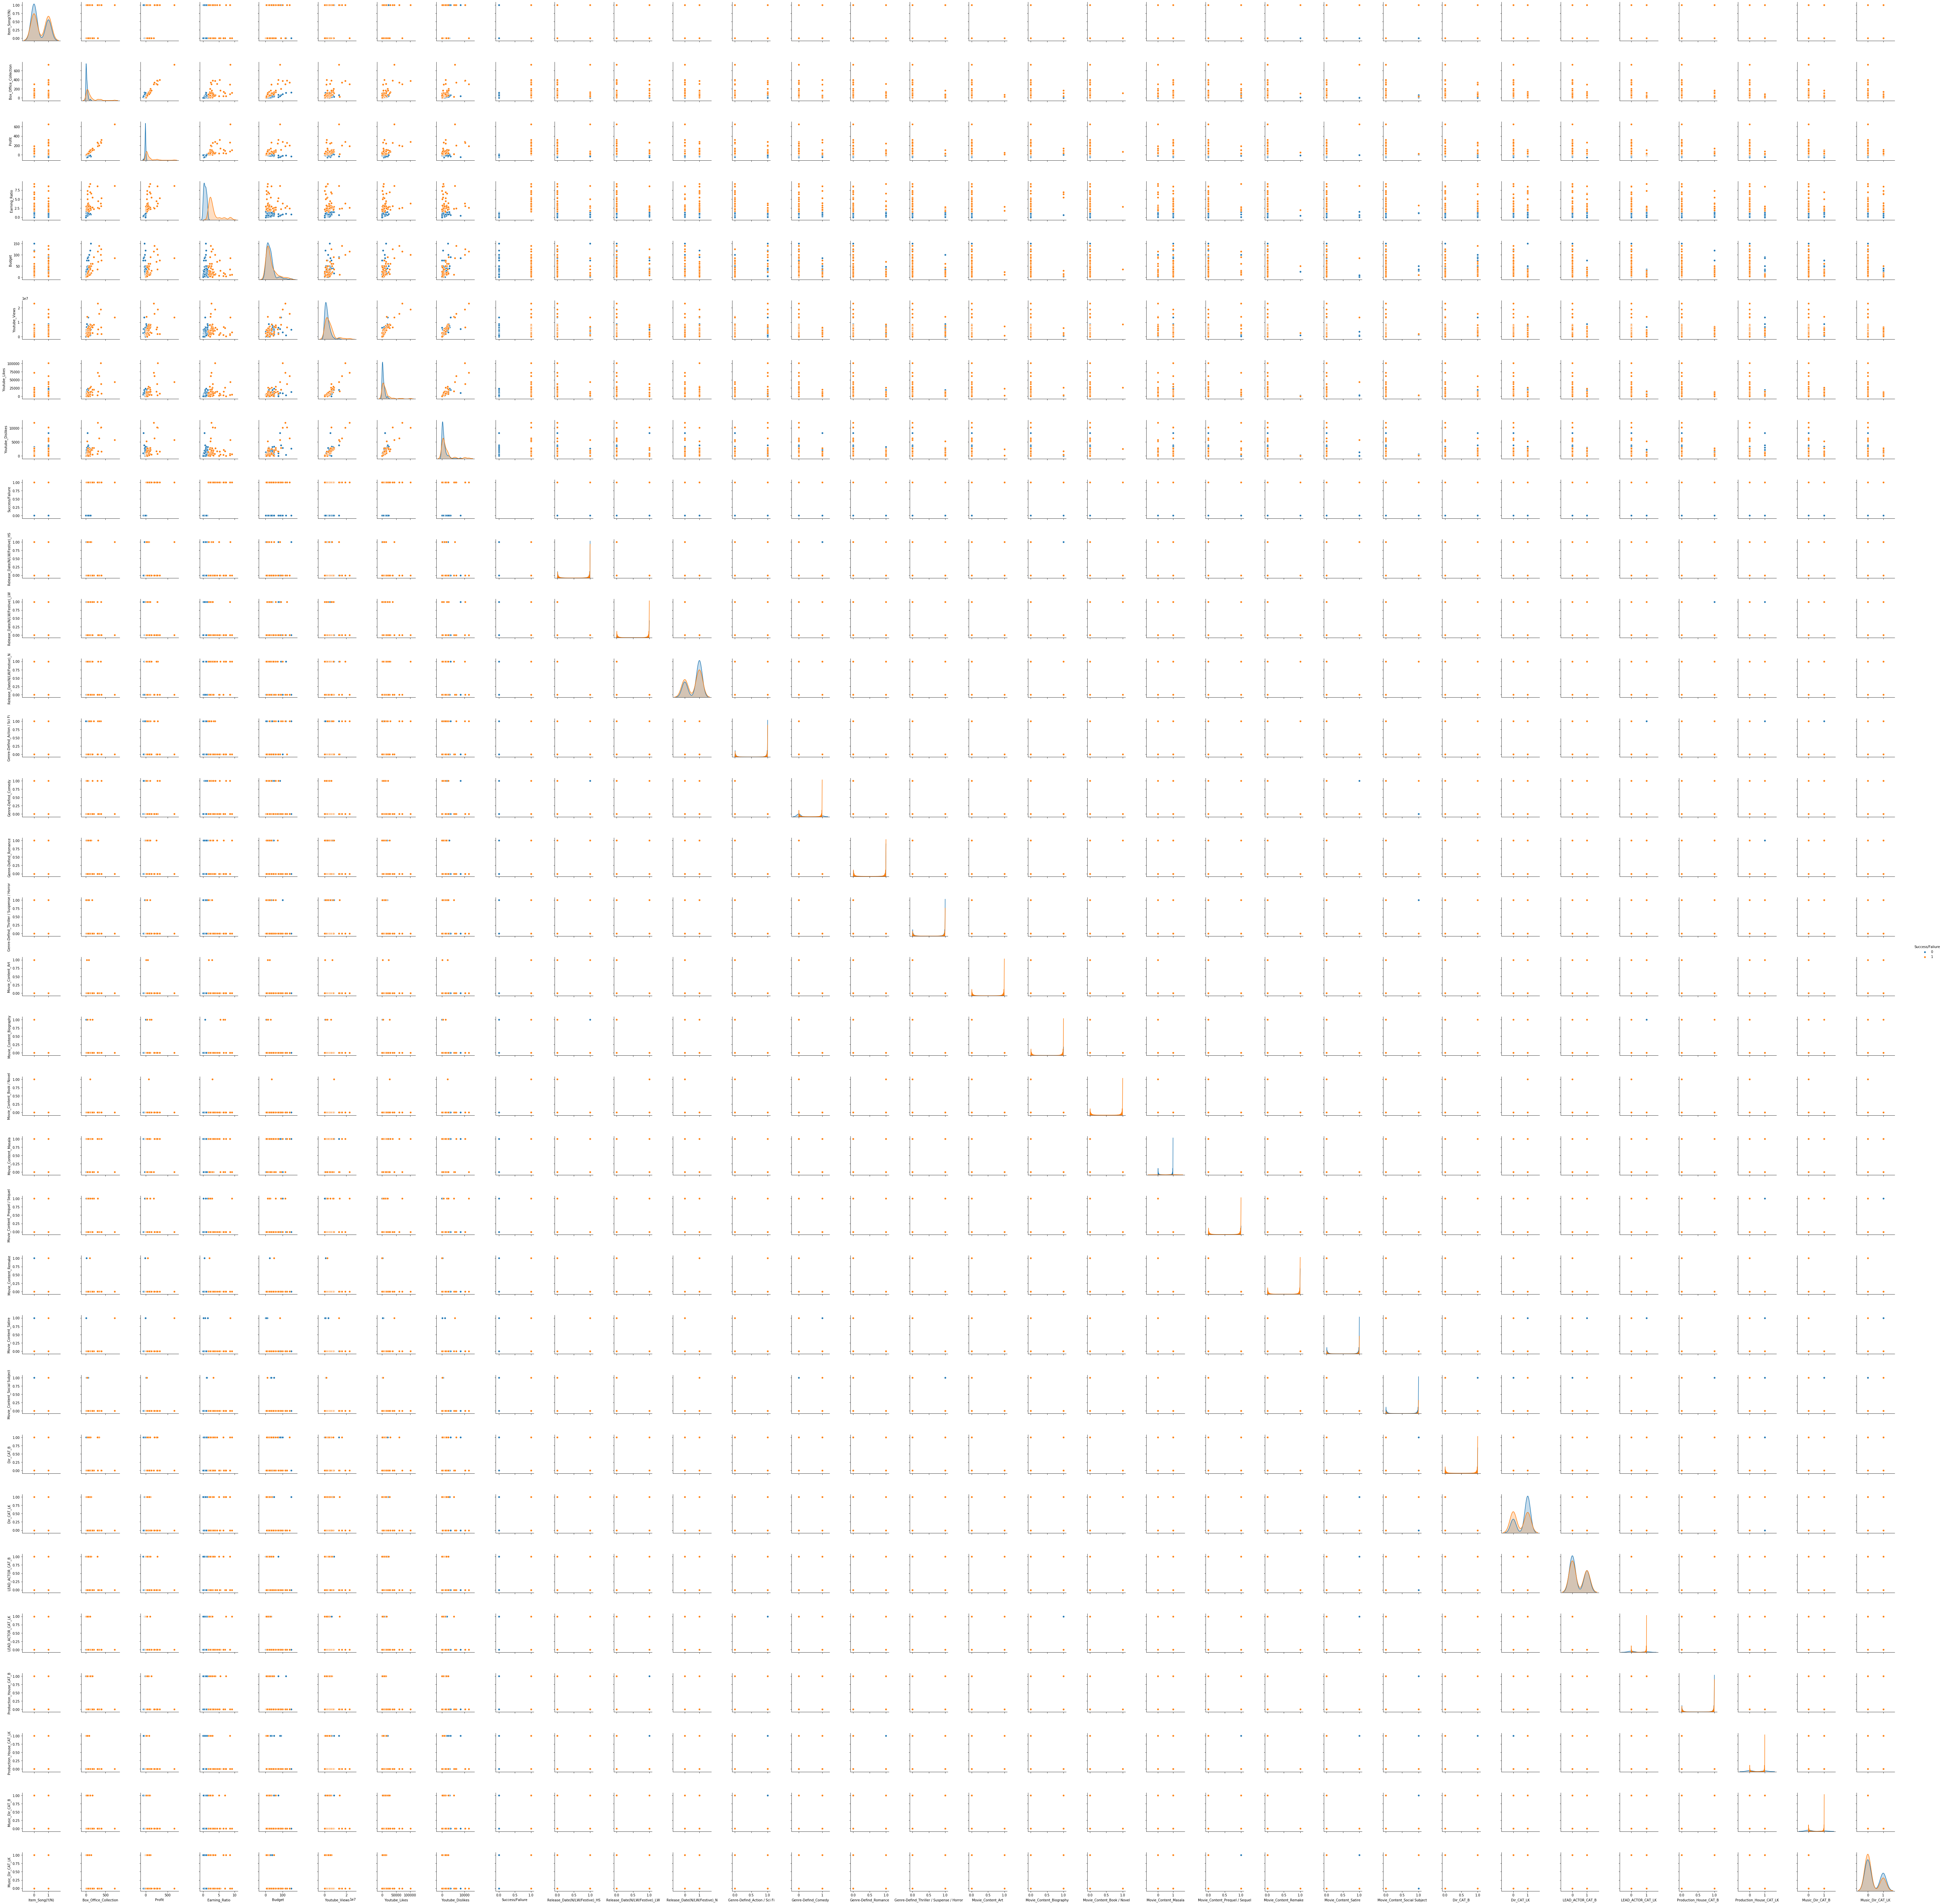

In [212]:

sns.pairplot(data = data_complete,hue = 'Success/Faliure')
plt.show()